In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
%matplotlib inline

# import os
# import pandas_datareader.data as web

In [12]:
# the index is column 2 which is the date
walmart = pd.read_csv("../../../Data & Script/tommywilczek-walmart/walmart.csv", index_col=2)
# only use store 1
#walmart = walmart.loc[walmart.Store == 1]
walmart = walmart[['Store','Dept','Weekly_Sales']].dropna()
# set index
#walmart = walmart.set_index('Date', append=False, inplace=True)
# convert index to datetime
walmart.index = pd.to_datetime(walmart.index)
walmart.sort_index(inplace=True)
walmart.head()

,Store,Dept,Weekly_Sales
Date,,,
2010-02-05,1,1.0,24924.50
2010-02-05,35,83.0,5015.30
2010-02-05,35,95.0,62831.98
2010-02-05,35,26.0,10870.40
2010-02-05,35,56.0,345.00


In [13]:
walmart['Prev_Week_Sales_By_Store_Dept'] = walmart.groupby(['Store', 'Dept' ]).Weekly_Sales.shift(1)
walmart = walmart.sort_values(by = ['Store','Dept', 'Date'])

walmart['Prev_4Week_Sales_By_Store_Dept'] = walmart.groupby(['Store', 'Dept' ]).Weekly_Sales.shift(4)
walmart = walmart.sort_values(by = ['Store','Dept', 'Date'])

walmart[20000:200020]

,Store,Dept,Weekly_Sales,Prev_Week_Sales_By_Store_Dept,Prev_4Week_Sales_By_Store_Dept
Date,,,,,
2012-08-17,2,95.0,151758.60,157227.55,148192.06
2012-08-24,2,95.0,137902.50,151758.60,149195.96
2012-08-31,2,95.0,154732.04,137902.50,159757.29
2012-09-07,2,95.0,155701.57,154732.04,157227.55
2012-09-14,2,95.0,151208.59,155701.57,151758.60
2012-09-21,2,95.0,145469.62,151208.59,137902.50
2012-09-28,2,95.0,144370.82,145469.62,154732.04
2012-10-05,2,95.0,152482.21,144370.82,155701.57
2012-10-12,2,95.0,145394.36,152482.21,151208.59


Read these

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://tomaugspurger.github.io/modern-7-timeseries

https://www.ethanrosenthal.com/2018/01/28/time-series-for-scikit-learn-people-part1/

In [14]:
# resample every 10 days
walmart.resample("10d").mean().head()

,Store,Dept,Weekly_Sales,Prev_Week_Sales_By_Store_Dept,Prev_4Week_Sales_By_Store_Dept
Date,,,,,
2010-02-05,22.027745,44.279479,16594.048068,17118.919855,NaN
2010-02-15,22.038965,44.305341,16216.658979,16435.646328,NaN
2010-02-25,22.042748,44.076506,15409.676239,15732.551561,17362.417976
2010-03-07,22.063304,44.107312,15546.850545,15915.296801,16779.549642
2010-03-17,22.074024,44.113752,15131.228470,15472.731396,15889.868263


In [15]:
y = walmart.Weekly_Sales
#y.index.name = 'date'
#y = y.resample('5T').last()
y.head()

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
Name: Weekly_Sales, dtype: float64

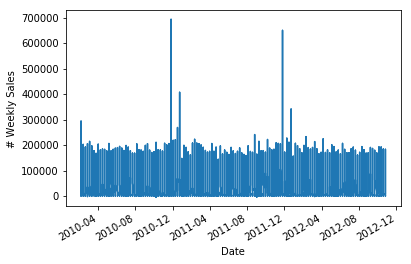

In [16]:
ax = y.plot();
ax.set_ylabel('# Weekly Sales');

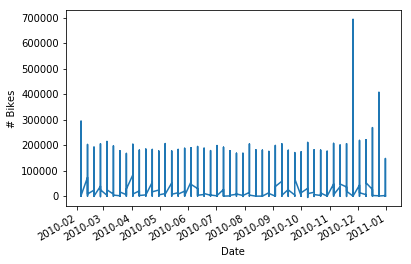

In [17]:
y.loc['2010'].plot();
plt.ylabel('# Bikes');